# 📊 Exploratory Data Analysis (EDA)
## Data Cafe di Kabupaten Cirebon - Google Maps

**Tujuan:** Menganalisis data cafe/kedai kopi hasil scraping Google Maps untuk mendapatkan insights bisnis

**Data Source:** `output/google_maps/gmaps_cafe_20260131_134158.csv`

**Tanggal Analisis:** 31 Januari 2026

---
## 1. Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Utilities
import warnings
from pathlib import Path

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


✅ Libraries imported successfully!


---
## 2. Load Data

In [2]:
# Load data
data_path = "../../output/google_maps/gmaps_cafe_20260131_134158.csv"
df = pd.read_csv(data_path)

print(f"📊 Data Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n✅ Data loaded successfully!")

📊 Data Shape: 74 rows × 11 columns

✅ Data loaded successfully!


---
## 3. Data Overview

In [3]:
# Data info
print("ℹ️ Data Information:")
df.info()

ℹ️ Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          74 non-null     int64  
 1   name           73 non-null     object 
 2   category       70 non-null     object 
 3   rating         74 non-null     object 
 4   total_reviews  0 non-null      float64
 5   address        74 non-null     object 
 6   phone          66 non-null     object 
 7   website        34 non-null     object 
 8   hours          0 non-null      float64
 9   coordinates    74 non-null     object 
 10  scraped_at     74 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 6.5+ KB


In [4]:
# Statistical summary
print("📈 Statistical Summary:")
df.describe(include='all')

📈 Statistical Summary:


,index,name,category,rating,total_reviews,address,phone,website,hours,coordinates,scraped_at
count,74.000000,73,70,74,0.0,74,66,34,0.0,74,74
unique,NaN,64,6,10,NaN,68,61,28,NaN,18,74
top,NaN,Daily Dose Club ( Coffee & Juice Bar ),Kedai Kopi,"4,7",NaN,"Jl. Tuparev No.20, Sutawinangun, Kec. Kedawung...",0822-6836-7017,https://www.instagram.com/sae.coffeeanddining/,NaN,"-6.7128614,108.4691137",2026-01-31 13:36:03
freq,NaN,2,33,19,NaN,2,2,2,NaN,17,1
mean,37.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21.505813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,19.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## 4. Data Cleaning

🔍 Missing Values Analysis:
                      Column  Missing Count  Missing %
total_reviews  total_reviews             74     100.00
hours                  hours             74     100.00
website              website             40      54.05
phone                  phone              8      10.81
category            category              4       5.41
name                    name              1       1.35
index                  index              0       0.00
rating                rating              0       0.00
address              address              0       0.00
coordinates      coordinates              0       0.00
scraped_at        scraped_at              0       0.00


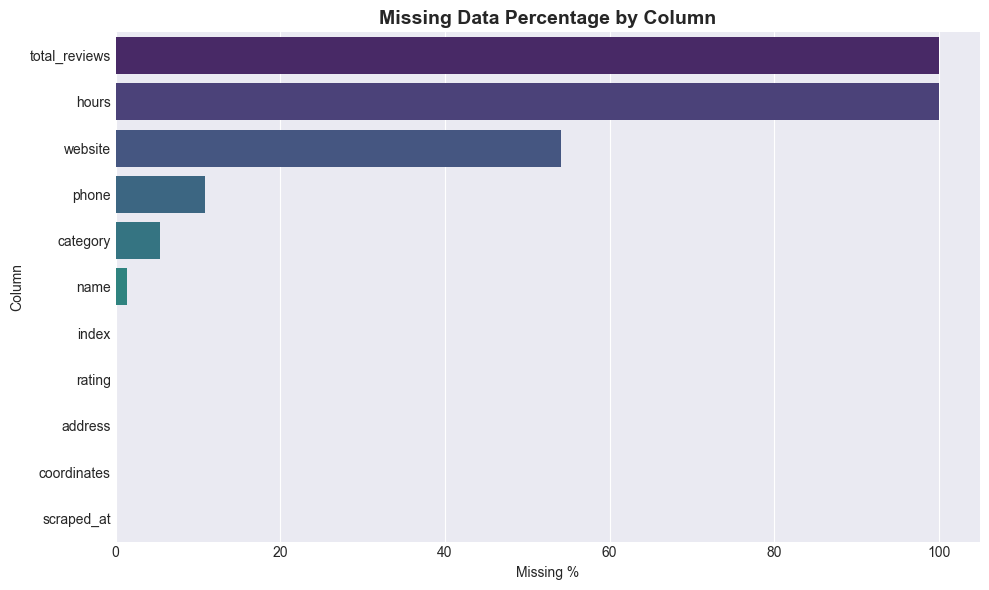

In [5]:
# Check missing values
print("🔍 Missing Values Analysis:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing Count', ascending=False)

print(missing_data)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_data, x='Missing %', y='Column', palette='viridis')
plt.title('Missing Data Percentage by Column', fontsize=14, fontweight='bold')
plt.xlabel('Missing %')
plt.tight_layout()
plt.savefig('../visualizations/missing_data.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Clean rating column (convert from '4,8' to 4.8)
df['rating_clean'] = df['rating'].str.replace(',', '.').astype(float)

# Split coordinates into latitude and longitude
df[['latitude', 'longitude']] = df['coordinates'].str.split(',', expand=True)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Extract city/district from address
df['district'] = df['address'].str.extract(r'Kec\. ([^,]+)')

# Check for duplicates
duplicates = df.duplicated(subset=['name', 'address']).sum()
print(f"\n🔄 Duplicate entries: {duplicates}")

# Remove duplicates
df_clean = df.drop_duplicates(subset=['name', 'address'], keep='first')
print(f"✅ Data after removing duplicates: {df_clean.shape[0]} rows")


🔄 Duplicate entries: 5
✅ Data after removing duplicates: 69 rows


---
## 5. Exploratory Data Analysis

### 5.1 Category Analysis

📊 Category Distribution:
category
Kedai Kopi                 30
Kafe                       28
Restoran                    4
Bar Dengan Pentas Musik     1
Toko kopi                   1
Toko Roti                   1
Name: count, dtype: int64


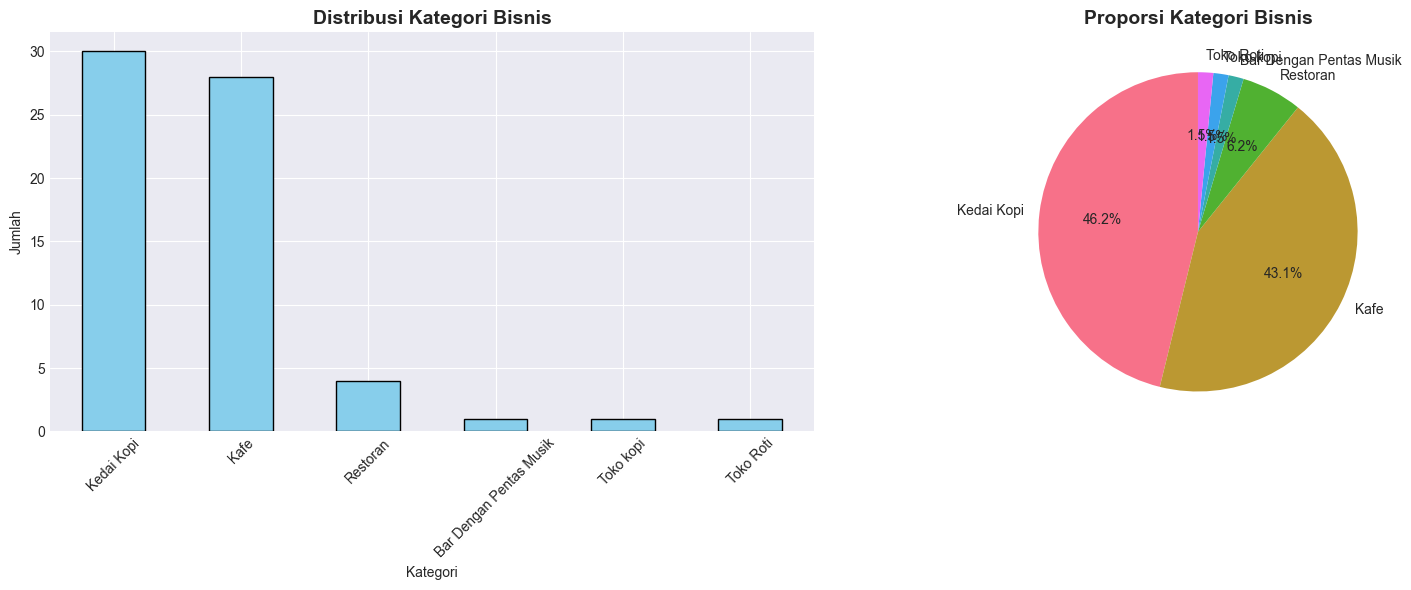

In [7]:
# Category distribution
category_counts = df_clean['category'].value_counts()
print("📊 Category Distribution:")
print(category_counts)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
category_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Distribusi Kategori Bisnis', fontsize=14, fontweight='bold')
ax1.set_xlabel('Kategori')
ax1.set_ylabel('Jumlah')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
category_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Proporsi Kategori Bisnis', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.savefig('../visualizations/category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 5.2 Rating Analysis

⭐ Rating Statistics:
Mean Rating: 4.62
Median Rating: 4.60
Min Rating: 4.10
Max Rating: 5.00
Std Dev: 0.20


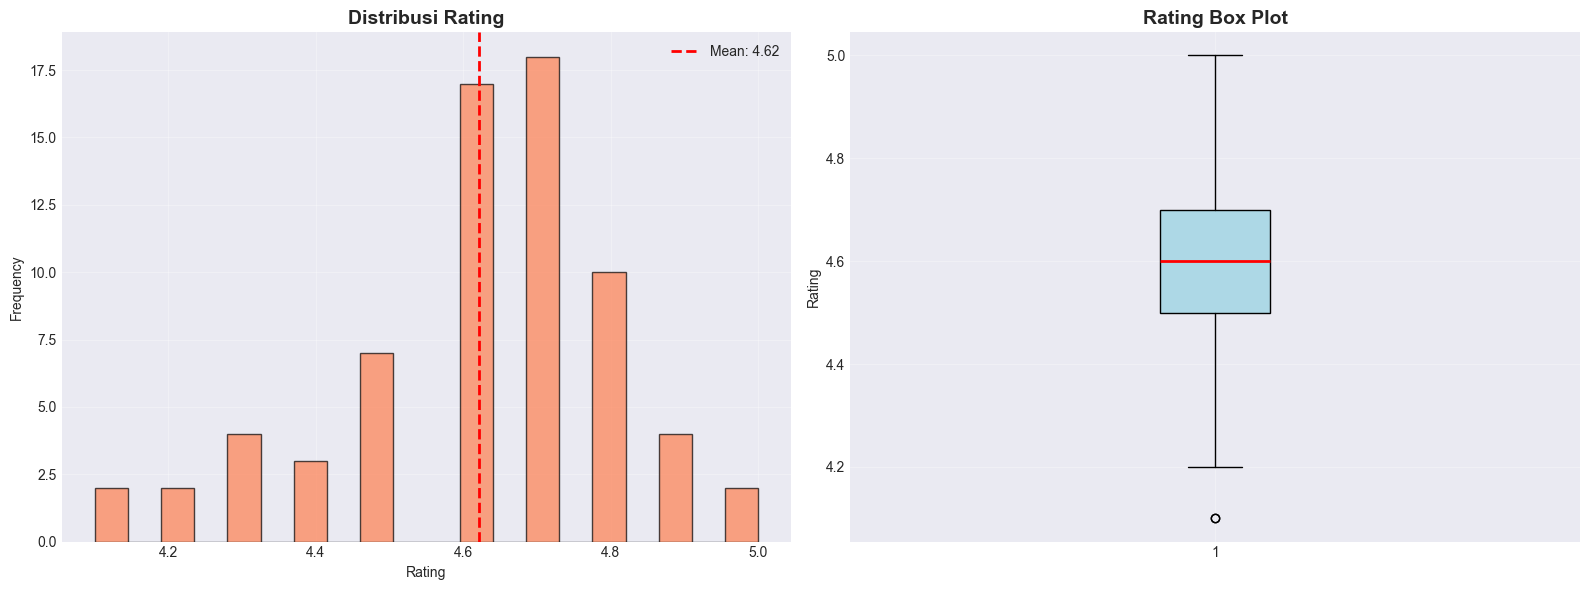

In [8]:
# Rating statistics
print("⭐ Rating Statistics:")
print(f"Mean Rating: {df_clean['rating_clean'].mean():.2f}")
print(f"Median Rating: {df_clean['rating_clean'].median():.2f}")
print(f"Min Rating: {df_clean['rating_clean'].min():.2f}")
print(f"Max Rating: {df_clean['rating_clean'].max():.2f}")
print(f"Std Dev: {df_clean['rating_clean'].std():.2f}")

# Rating distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
ax1.hist(df_clean['rating_clean'], bins=20, color='coral', edgecolor='black', alpha=0.7)
ax1.axvline(df_clean['rating_clean'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["rating_clean"].mean():.2f}')
ax1.set_title('Distribusi Rating', fontsize=14, fontweight='bold')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(alpha=0.3)

# Box plot
ax2.boxplot(df_clean['rating_clean'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red', linewidth=2))
ax2.set_title('Rating Box Plot', fontsize=14, fontweight='bold')
ax2.set_ylabel('Rating')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


⭐ Average Rating by Category:
                         mean  count   std
category                                  
Toko kopi                4.90      1   NaN
Kedai Kopi               4.67     30  0.19
Bar Dengan Pentas Musik  4.60      1   NaN
Restoran                 4.60      4  0.22
Toko Roti                4.60      1   NaN
Kafe                     4.55     28  0.20


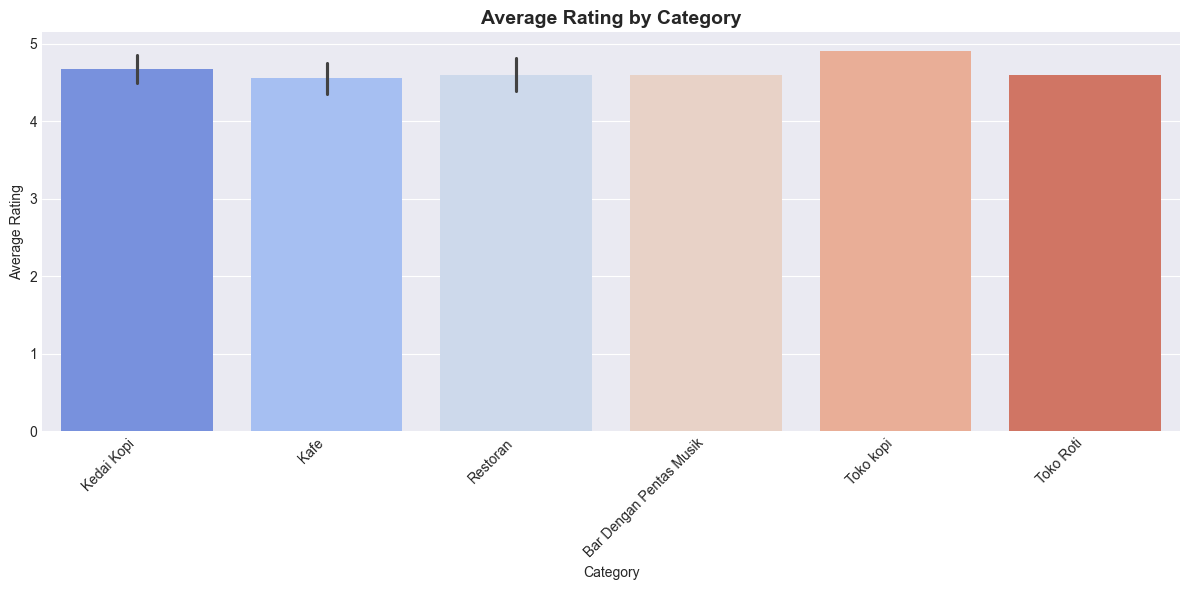

In [9]:
# Rating by category
rating_by_category = df_clean.groupby('category')['rating_clean'].agg(['mean', 'count', 'std']).round(2)
rating_by_category = rating_by_category.sort_values('mean', ascending=False)
print("\n⭐ Average Rating by Category:")
print(rating_by_category)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(data=df_clean, x='category', y='rating_clean', palette='coolwarm', ci='sd')
plt.title('Average Rating by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../visualizations/rating_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

### 5.3 Top Rated Cafes

🏆 Top 10 Highest Rated Cafes:
                                      name   category  rating_clean                                                                                          address          phone
                             Tsurayya Cafe Kedai Kopi           5.0                                  7F5V+4VX, Watubelah, Kec. Sumber, Kabupaten Cirebon, Jawa Barat 0851-5785-5530
                       Lumos Cafe & Eatery Kedai Kopi           5.0                                   5H32+696, Kamarang, Kec. Greged, Kabupaten Cirebon, Jawa Barat  0811-2222-061
                            Kohitsu Coffee Kedai Kopi           4.9                 Jl. DR. Sudarsono No.274a, Kesambi, Kec. Kesambi, Kota Cirebon, Jawa Barat 45134 0851-7424-0231
                                219 Coffee Kedai Kopi           4.9        Jl. Jenderal Sudirman No.219, Harjamukti, Kec. Harjamukti, Kota Cirebon, Jawa Barat 45143 0859-6714-1973
                Har's Coffee Snack Cirebon  Toko kopi           4.9   

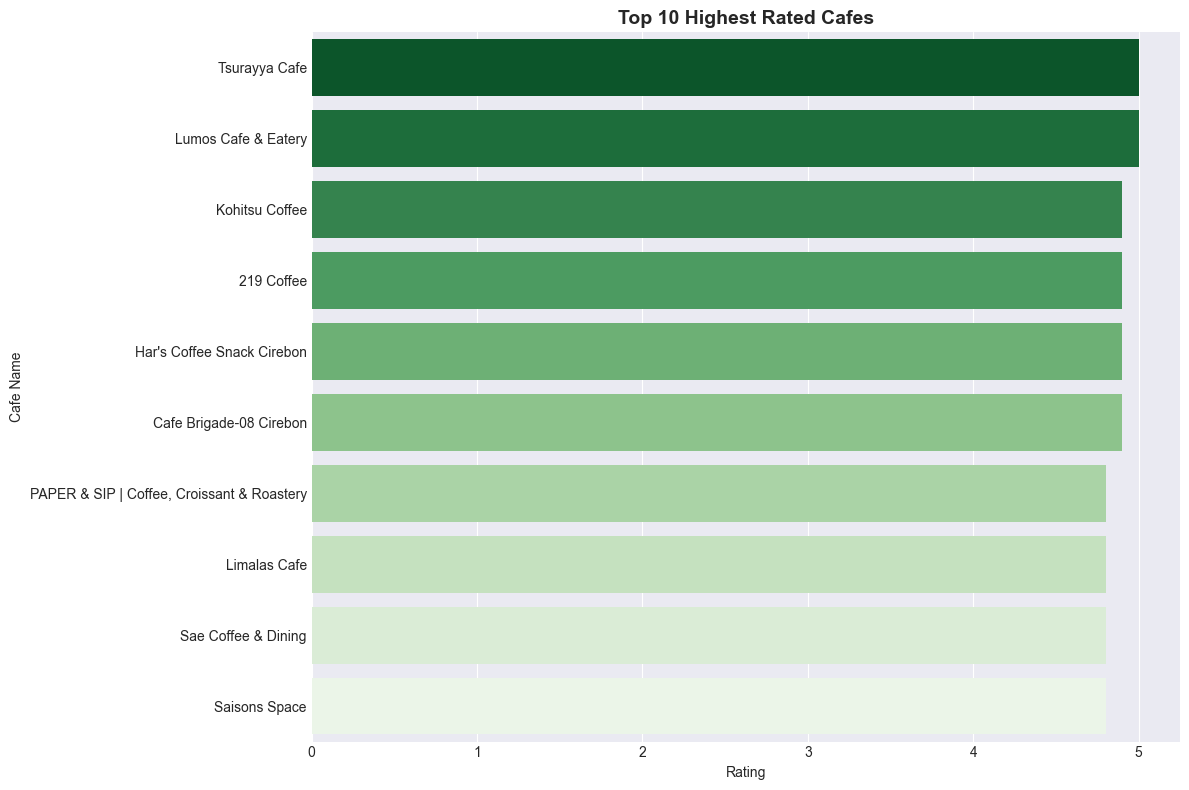

In [10]:
# Top 10 highest rated cafes
top_cafes = df_clean.nlargest(10, 'rating_clean')[['name', 'category', 'rating_clean', 'address', 'phone']]
print("🏆 Top 10 Highest Rated Cafes:")
print(top_cafes.to_string(index=False))

# Visualize
plt.figure(figsize=(12, 8))
top_10 = df_clean.nlargest(10, 'rating_clean')
sns.barplot(data=top_10, y='name', x='rating_clean', palette='Greens_r')
plt.title('Top 10 Highest Rated Cafes', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Cafe Name')
plt.tight_layout()
plt.savefig('../visualizations/top_10_cafes.png', dpi=300, bbox_inches='tight')
plt.show()

### 5.4 Geographic Distribution

📍 Top 10 Districts by Number of Cafes:
district
Kesambi         23
Kedawung        14
Kejaksan         7
Sumber           5
Harjamukti       4
Weru             2
Plumbon          2
Lemahwungkuk     2
Pekalipan        2
Mundu            2
Name: count, dtype: int64


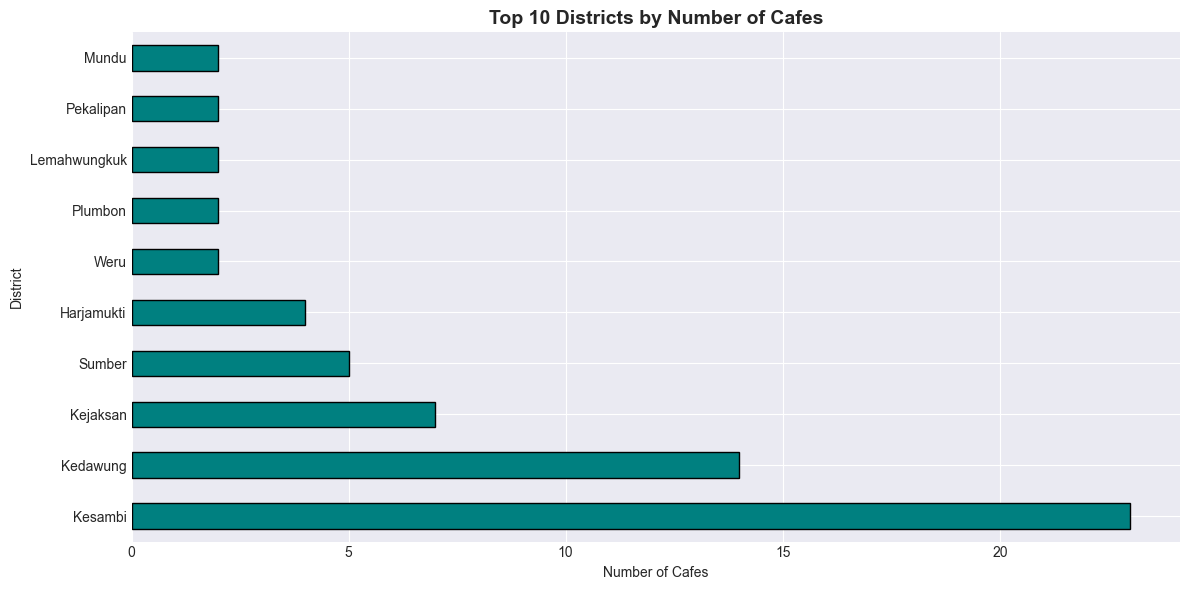

In [11]:
# District distribution
district_counts = df_clean['district'].value_counts().head(10)
print("📍 Top 10 Districts by Number of Cafes:")
print(district_counts)

# Visualize
plt.figure(figsize=(12, 6))
district_counts.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Districts by Number of Cafes', fontsize=14, fontweight='bold')
plt.xlabel('Number of Cafes')
plt.ylabel('District')
plt.tight_layout()
plt.savefig('../visualizations/district_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Interactive map using Plotly
fig = px.scatter_mapbox(
    df_clean,
    lat='latitude',
    lon='longitude',
    hover_name='name',
    hover_data={'category': True, 'rating_clean': True, 'latitude': False, 'longitude': False},
    color='rating_clean',
    size='rating_clean',
    color_continuous_scale='Viridis',
    zoom=11,
    height=600,
    title='Geographic Distribution of Cafes in Cirebon'
)

fig.update_layout(
    mapbox_style='open-street-map',
    margin={"r": 0, "t": 40, "l": 0, "b": 0}
)

fig.write_html('../visualizations/cafe_map.html')
fig.show()
print("\n✅ Interactive map saved to: analysis/visualizations/cafe_map.html")


✅ Interactive map saved to: analysis/visualizations/cafe_map.html


### 5.5 Contact Information Analysis

📞 Contact Information:
Cafes with Phone: 62 (89.9%)
Cafes without Phone: 7 (10.1%)

Cafes with Website: 30 (43.5%)
Cafes without Website: 39 (56.5%)


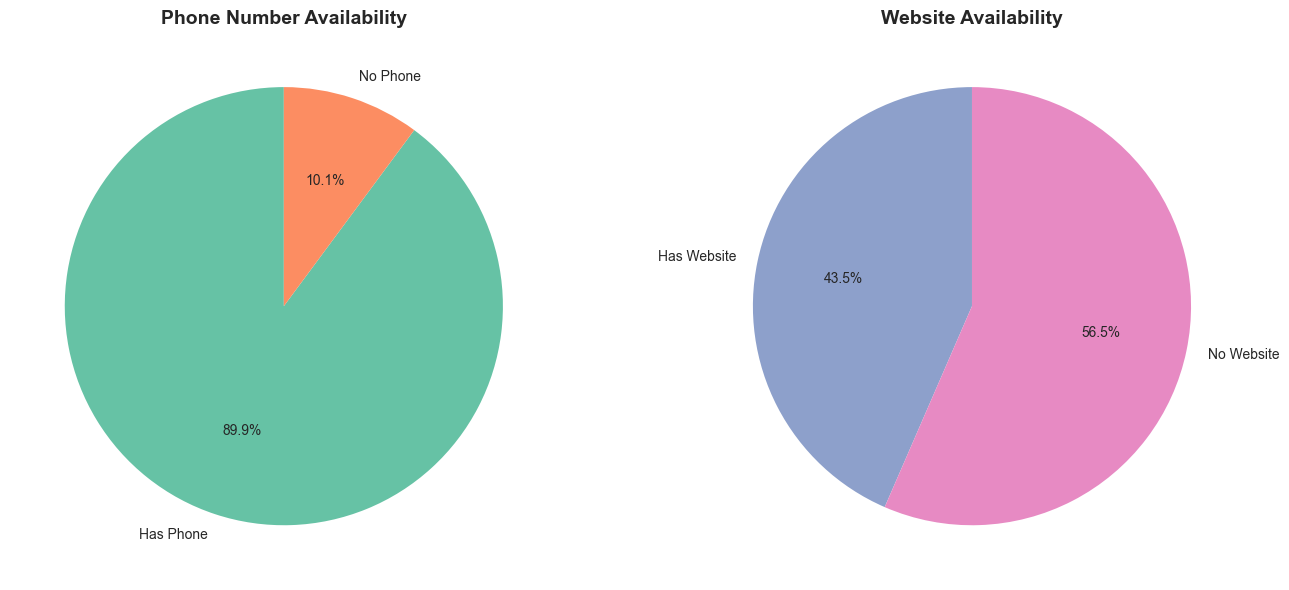

In [13]:
# Phone availability
phone_available = df_clean['phone'].notna().sum()
phone_missing = df_clean['phone'].isna().sum()

# Website availability
website_available = df_clean['website'].notna().sum()
website_missing = df_clean['website'].isna().sum()

print("📞 Contact Information:")
print(f"Cafes with Phone: {phone_available} ({phone_available/len(df_clean)*100:.1f}%)")
print(f"Cafes without Phone: {phone_missing} ({phone_missing/len(df_clean)*100:.1f}%)")
print(f"\nCafes with Website: {website_available} ({website_available/len(df_clean)*100:.1f}%)")
print(f"Cafes without Website: {website_missing} ({website_missing/len(df_clean)*100:.1f}%)")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Phone availability
ax1.pie([phone_available, phone_missing], labels=['Has Phone', 'No Phone'], 
        autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
ax1.set_title('Phone Number Availability', fontsize=14, fontweight='bold')

# Website availability
ax2.pie([website_available, website_missing], labels=['Has Website', 'No Website'], 
        autopct='%1.1f%%', startangle=90, colors=['#8da0cb', '#e78ac3'])
ax2.set_title('Website Availability', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/contact_availability.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 6. Key Insights & Summary

In [14]:
# Generate summary report
summary = f"""
{'='*80}
📊 EXECUTIVE SUMMARY - CAFE ANALYSIS KABUPATEN CIREBON
{'='*80}

📅 Data Collection Date: 31 Januari 2026
📍 Location: Kabupaten Cirebon, Jawa Barat
🔢 Total Cafes Analyzed: {len(df_clean)}

{'='*80}
🏆 KEY FINDINGS:
{'='*80}

1. CATEGORY DISTRIBUTION:
   - Most common category: {df_clean['category'].value_counts().index[0]} ({df_clean['category'].value_counts().values[0]} cafes)
   - Total unique categories: {df_clean['category'].nunique()}

2. RATING INSIGHTS:
   - Average Rating: {df_clean['rating_clean'].mean():.2f} ⭐
   - Highest Rating: {df_clean['rating_clean'].max():.1f} ⭐
   - Lowest Rating: {df_clean['rating_clean'].min():.1f} ⭐
   - Cafes with rating ≥ 4.5: {len(df_clean[df_clean['rating_clean'] >= 4.5])} ({len(df_clean[df_clean['rating_clean'] >= 4.5])/len(df_clean)*100:.1f}%)

3. GEOGRAPHIC DISTRIBUTION:
   - Most cafes located in: {df_clean['district'].value_counts().index[0]} ({df_clean['district'].value_counts().values[0]} cafes)
   - Total districts covered: {df_clean['district'].nunique()}

4. DIGITAL PRESENCE:
   - Cafes with phone numbers: {phone_available} ({phone_available/len(df_clean)*100:.1f}%)
   - Cafes with websites: {website_available} ({website_available/len(df_clean)*100:.1f}%)

5. TOP PERFORMERS:
   - Highest rated cafe: {df_clean.nlargest(1, 'rating_clean')['name'].values[0]}
   - Rating: {df_clean.nlargest(1, 'rating_clean')['rating_clean'].values[0]:.1f} ⭐

{'='*80}
💡 BUSINESS RECOMMENDATIONS:
{'='*80}

1. MARKET OPPORTUNITY:
   - Focus on districts with fewer cafes for less competition
   - Consider opening in: {', '.join(df_clean['district'].value_counts().tail(3).index.tolist())}

2. DIGITAL MARKETING:
   - {website_missing} cafes ({website_missing/len(df_clean)*100:.1f}%) don't have websites
   - Opportunity for digital marketing services

3. QUALITY BENCHMARK:
   - Target rating: ≥ 4.5 to be in top tier
   - Current average: {df_clean['rating_clean'].mean():.2f}

4. CATEGORY INSIGHTS:
   - Most popular: {df_clean['category'].value_counts().index[0]}
   - Consider differentiation strategies

{'='*80}
"""

print(summary)

# Save summary to file
with open('../reports/eda_summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print("\n✅ Summary report saved to: analysis/reports/eda_summary.txt")


📊 EXECUTIVE SUMMARY - CAFE ANALYSIS KABUPATEN CIREBON

📅 Data Collection Date: 31 Januari 2026
📍 Location: Kabupaten Cirebon, Jawa Barat
🔢 Total Cafes Analyzed: 69

🏆 KEY FINDINGS:

1. CATEGORY DISTRIBUTION:
   - Most common category: Kedai Kopi (30 cafes)
   - Total unique categories: 6

2. RATING INSIGHTS:
   - Average Rating: 4.62 ⭐
   - Highest Rating: 5.0 ⭐
   - Lowest Rating: 4.1 ⭐
   - Cafes with rating ≥ 4.5: 58 (84.1%)

3. GEOGRAPHIC DISTRIBUTION:
   - Most cafes located in: Kesambi (23 cafes)
   - Total districts covered: 14

4. DIGITAL PRESENCE:
   - Cafes with phone numbers: 62 (89.9%)
   - Cafes with websites: 30 (43.5%)

5. TOP PERFORMERS:
   - Highest rated cafe: Tsurayya Cafe
   - Rating: 5.0 ⭐

💡 BUSINESS RECOMMENDATIONS:

1. MARKET OPPORTUNITY:
   - Focus on districts with fewer cafes for less competition
   - Consider opening in: Beber, Greged, Talun

2. DIGITAL MARKETING:
   - 39 cafes (56.5%) don't have websites
   - Opportunity for digital marketing services

3. 

---
## 7. Export Cleaned Data

In [15]:
# Save cleaned data
output_path = '../reports/cleaned_cafe_data.csv'
df_clean.to_csv(output_path, index=False)
print(f"✅ Cleaned data exported to: {output_path}")

# Export summary statistics
summary_stats = df_clean[['category', 'rating_clean', 'district']].describe(include='all')
summary_stats.to_csv('../reports/summary_statistics.csv')
print(f"✅ Summary statistics exported to: analysis/reports/summary_statistics.csv")

✅ Cleaned data exported to: ../reports/cleaned_cafe_data.csv
✅ Summary statistics exported to: analysis/reports/summary_statistics.csv


---
## 📝 Conclusion

Analisis ini memberikan insights komprehensif tentang landscape cafe/kedai kopi di Kabupaten Cirebon:

### ✅ **Completed Analysis:**
1. ✅ Data cleaning & preprocessing
2. ✅ Category distribution analysis
3. ✅ Rating analysis & benchmarking
4. ✅ Geographic distribution mapping
5. ✅ Digital presence assessment
6. ✅ Business recommendations

### 📊 **Deliverables:**
- Cleaned dataset
- 7+ visualizations
- Interactive map
- Executive summary report
- Statistical summary

### 🎯 **Next Steps:**
1. Conduct competitor analysis
2. Analyze customer reviews (if available)
3. Time-series analysis for trends
4. Pricing analysis

---
**Author:** Data Analysis Team  
**Date:** 31 Januari 2026  
**Version:** 1.0